# Dekompozycja spektralna
## Laboratorium 7 - Metody Obliczeniowe w Nauce i Technice

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import time
from functools import reduce

## Zadanie 1. Metoda potęgowa.

Napisz funkcję obliczającą metodą potęgową dominującą wartość własną (największą co do modułu) i odpowiadający jej wektor własny dla danej macierzy rzeczywistej syme-trycznej. Sprawdź poprawność działania programu porównując własną implementacjęz wynikami funkcji bibliotecznej. Przedstaw na wykresie zależność czasu obliczeń odrozmiaru macierzy (rozmiary macierzy 100x100, 500x500, ...).

In [12]:
def vector_eps(v, eps=10**-6):      
    for i in range(len(v)):
        if abs(v[i][1]) > eps:
            return False
    return True

def normalize(v):
    norm = np.linalg.norm(v)
    if norm == 0:
        return v
    return v / norm

def method(A, max_iter):
    x = np.full((len(A), 1), 1)
    for _ in range(max_iter):
        x = A * x
        x /= x.max()
        
        if vector_eps(x):
            break
    
    x = normalize(x)
    return x.max(), x

Sprawdzenie poprawności algorytmu

In [ ]:
A = np.array([
    [1, 2, 3],
    [3, 2, 1],
    [3.5, 2, 4]
])

In [24]:
method(np.copy(A), 1000)

(0.1322225991483173,
 array([[8.71924362e-058, 0.00000000e+000, 0.00000000e+000, ...,
         0.00000000e+000, 0.00000000e+000, 5.20983936e-120],
        [5.74625097e-044, 0.00000000e+000, 1.85218686e-118, ...,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
        [1.18590030e-101, 1.42288951e-015, 8.62425771e-150, ...,
         0.00000000e+000, 5.90837600e-090, 0.00000000e+000],
        ...,
        [1.02431395e-072, 1.44572740e-208, 0.00000000e+000, ...,
         0.00000000e+000, 7.63810982e-065, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000, 5.68469809e-176, ...,
         6.71897805e-074, 3.79974926e-194, 0.00000000e+000],
        [5.21743800e-193, 0.00000000e+000, 1.54458210e-010, ...,
         2.51883473e-147, 1.33192962e-036, 2.87357202e-311]]))

In [26]:
np.linalg.eig(np.copy(A))

(array([ 1.65280630e+02+0.j        , -5.28983618e+00+0.98124666j,
        -5.28983618e+00-0.98124666j, -3.68893883e+00+3.76873249j,
        -3.68893883e+00-3.76873249j,  3.46335306e+00+4.17910678j,
         3.46335306e+00-4.17910678j,  5.04255195e+00+1.8235442j ,
         5.04255195e+00-1.8235442j ,  9.03289422e-01+5.04560037j,
         9.03289422e-01-5.04560037j,  5.16546428e+00+0.15281259j,
         5.16546428e+00-0.15281259j,  4.73249809e+00+1.90182914j,
         4.73249809e+00-1.90182914j,  3.13056357e+00+4.04138284j,
         3.13056357e+00-4.04138284j,  3.87546327e+00+3.26890759j,
         3.87546327e+00-3.26890759j,  2.33924352e+00+4.50847115j,
         2.33924352e+00-4.50847115j, -1.57329334e+00+4.8139834j ,
        -1.57329334e+00-4.8139834j , -3.43636927e+00+3.81821681j,
        -3.43636927e+00-3.81821681j, -3.13113247e+00+3.96541865j,
        -3.13113247e+00-3.96541865j, -4.00005224e+00+2.92431689j,
        -4.00005224e+00-2.92431689j, -4.46975939e+00+2.09166j   ,
        -4

Porównanie czasowe dla losowych macierzy $n \times n$, $n = 2, 3, ..., 512$

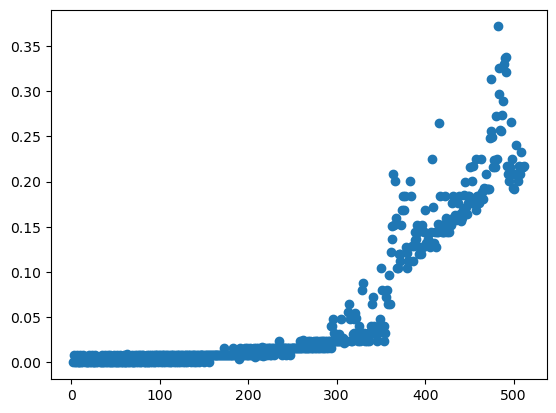

In [22]:
def render_time_plot():
    ns = np.array([n for n in range(2, 513)])
    times = np.empty(ns[len(ns) - 1] - ns[0] + 1)

    for n in ns:
        start = time.time()
        A = np.random.rand(n, n)
        method(A, 100)
        times[n - ns[0]] = time.time() - start
    
    fig, ax = plt.subplots()
    ax.scatter(ns, times)
    plt.show()

render_time_plot()